In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from udisc_stats.preprocess import print_segments, preprocess

from udisc_stats.visualize import (
    get_year_stats,
    moving_avg,
    get_score_avg,
    get_score_counts,
    get_player_stats,
    get_month_df,
    get_goal,
    plot_month_df,
)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
orig_df = pd.read_csv("~/Downloads/Udisc Scorecards 7.csv")

orig_df.head(40)

,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
0,Par,Bryan Park,Yellow Tees (Shorts),2023-02-27 1731,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-27 1731,58,0.0,3,3,3,4,3,3,3,4,4,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riley,Bryan Park,Yellow Tees (Shorts),2023-02-27 1731,64,6.0,3,3,3,5,3,3,2,4,4,3.0,10.0,3.0,3.0,3.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Par,Bryan Park,Yellow Tees (Shorts),2023-02-24 1611,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-24 1611,59,1.0,3,4,3,3,3,3,3,4,3,3.0,5.0,2.0,4.0,4.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Riley,Bryan Park,Yellow Tees (Shorts),2023-02-24 1611,78,20.0,4,3,6,4,3,4,3,6,4,5.0,6.0,3.0,3.0,7.0,3.0,4.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Par,Bryan Park,Yellow Tees (Shorts),2023-02-23 1730,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-23 1730,59,1.0,3,3,3,4,3,2,3,4,3,6.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Par,Bryan Park,Yellow Tees (Shorts),2023-02-22 1653,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-22 1653,60,2.0,3,2,3,4,3,3,2,5,4,3.0,7.0,3.0,2.0,3.0,2.0,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = preprocess(orig_df)

df.head(40)

2020-11-05 17:22:00


,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28,LayoutNameAdj,Year
0,Par,Bryan Park,Yellow Tees (Shorts),2023-02-27 17:31:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
1,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-27 17:31:00,58,0.0,3,3,3,4,3,3,3,4,4,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
2,Riley,Bryan Park,Yellow Tees (Shorts),2023-02-27 17:31:00,64,6.0,3,3,3,5,3,3,2,4,4,3.0,10.0,3.0,3.0,3.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
3,Par,Bryan Park,Yellow Tees (Shorts),2023-02-24 16:11:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
4,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-24 16:11:00,59,1.0,3,4,3,3,3,3,3,4,3,3.0,5.0,2.0,4.0,4.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
5,Riley,Bryan Park,Yellow Tees (Shorts),2023-02-24 16:11:00,78,20.0,4,3,6,4,3,4,3,6,4,5.0,6.0,3.0,3.0,7.0,3.0,4.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
6,Par,Bryan Park,Yellow Tees (Shorts),2023-02-23 17:30:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
7,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-23 17:30:00,59,1.0,3,3,3,4,3,2,3,4,3,6.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
8,Par,Bryan Park,Yellow Tees (Shorts),2023-02-22 16:53:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
9,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-22 16:53:00,60,2.0,3,2,3,4,3,3,2,5,4,3.0,7.0,3.0,2.0,3.0,2.0,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023


In [4]:
print_segments(df)

Players: ['Par', 'Monkey', 'Riley', 'Kameron', 'Allison', 'Sam Forsyth', 'Josh', 'Anna', 'Noah', 'Natty', 'Jack', 'Bryan Der', 'Holly', 'Scott', 'James M.', 'Austin', 'Bryce', 'John Farmer', 'Tyler', 'Hitesh', 'Glasser', 'David', 'Patty Ice ']
Courses: ['Bryan Park', 'Dunncroft - Castle Point Park', 'Walnut Creek Park', 'THE Diavolo DGC @ New Hope Park', 'Gillies Creek Park', 'University Of Richmond', 'Dorey Park', 'Elver Park', 'Nine Springs Golf Course', 'Schenley Park', 'Loriella Park', "Bird's Ruins DGC", 'Bluemont Park']
Layouts: ['Yellows Tees', 'Shorts then Longs', 'Short - Long', 'Paver Tees', 'Red - Short Tees', 'Diavolo White', 'Main', 'White - Short Tees', 'Front 9 ', '2022 USWDGC', 'White Tees', 'White Tees to Yellow Baskets', 'Shorts To Shorts', 'Back 9', 'Blue - Long Tees', 'Chainbangers’ 18', 'Short tees Red baskets']


- Number rounds: 40 (22)
- Best score
- Percent birdies / pars / bogies (compare to last year)

In [5]:
course="Bryan Park"
# course="Dunncroft - Castle Point Park"

layout="Yellows Tees"
# layout="Paver Tees"
# layout = "Shorts then Longs"

# min_date="2020-01"
# min_date="2021-01"
min_date="2022-01"

In [6]:
df

,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28,LayoutNameAdj,Year
0,Par,Bryan Park,Yellow Tees (Shorts),2023-02-27 17:31:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
1,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-27 17:31:00,58,0.0,3,3,3,4,3,3,3,4,4,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
2,Riley,Bryan Park,Yellow Tees (Shorts),2023-02-27 17:31:00,64,6.0,3,3,3,5,3,3,2,4,4,3.0,10.0,3.0,3.0,3.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
3,Par,Bryan Park,Yellow Tees (Shorts),2023-02-24 16:11:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
4,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-24 16:11:00,59,1.0,3,4,3,3,3,3,3,4,3,3.0,5.0,2.0,4.0,4.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,Monkey,Bryan Park,Main,2020-10-12 11:58:00,80,22.0,4,4,4,6,4,4,3,6,6,4.0,8.0,5.0,4.0,3.0,3.0,3.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2020
909,Par,Bryan Park,Main,2020-10-09 13:33:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2020
910,Monkey,Bryan Park,Main,2020-10-09 13:33:00,77,19.0,4,4,4,5,4,3,5,5,5,4.0,7.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2020
911,Par,Dunncroft - Castle Point Park,Shorts then Longs,2020-10-07 18:02:00,54,NaN,3,3,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shorts then Longs,2020


Yearly Stats for Monkey at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18
40,Monkey,Bryan Park,Yellows Tees,2020,76.272727,18.272727,3.545455,4.090909,4.000000,4.727273,3.909091,3.727273,3.545455,5.181818,4.727273,4.090909,6.181818,3.818182,3.818182,5.000000,3.727273,4.090909,4.909091,3.181818
41,Monkey,Bryan Park,Yellows Tees,2021,62.240506,4.240506,2.898734,3.253165,3.189873,4.139241,3.139241,3.075949,3.025316,3.936709,3.949367,3.569620,5.063291,3.164557,3.253165,3.443038,2.987342,3.202532,4.139241,2.810127
42,Monkey,Bryan Park,Yellows Tees,2022,57.915663,-0.084337,2.951807,3.036145,2.963855,3.939759,2.915663,2.843373,2.783133,3.710843,3.566265,3.361446,4.566265,2.843373,3.216867,3.313253,2.915663,2.951807,3.397590,2.638554
43,Monkey,Bryan Park,Yellows Tees,2023,58.038462,0.038462,2.846154,2.961538,2.923077,3.884615,2.807692,2.846154,2.807692,3.846154,3.653846,3.461538,4.653846,2.846154,3.153846,3.423077,2.846154,3.307692,3.153846,2.615385


/Users/justin/github/udisc_stats/udisc_stats/visualize.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df["MonthStr"] = viz_df["Month"].dt.strftime("%Y-%m")


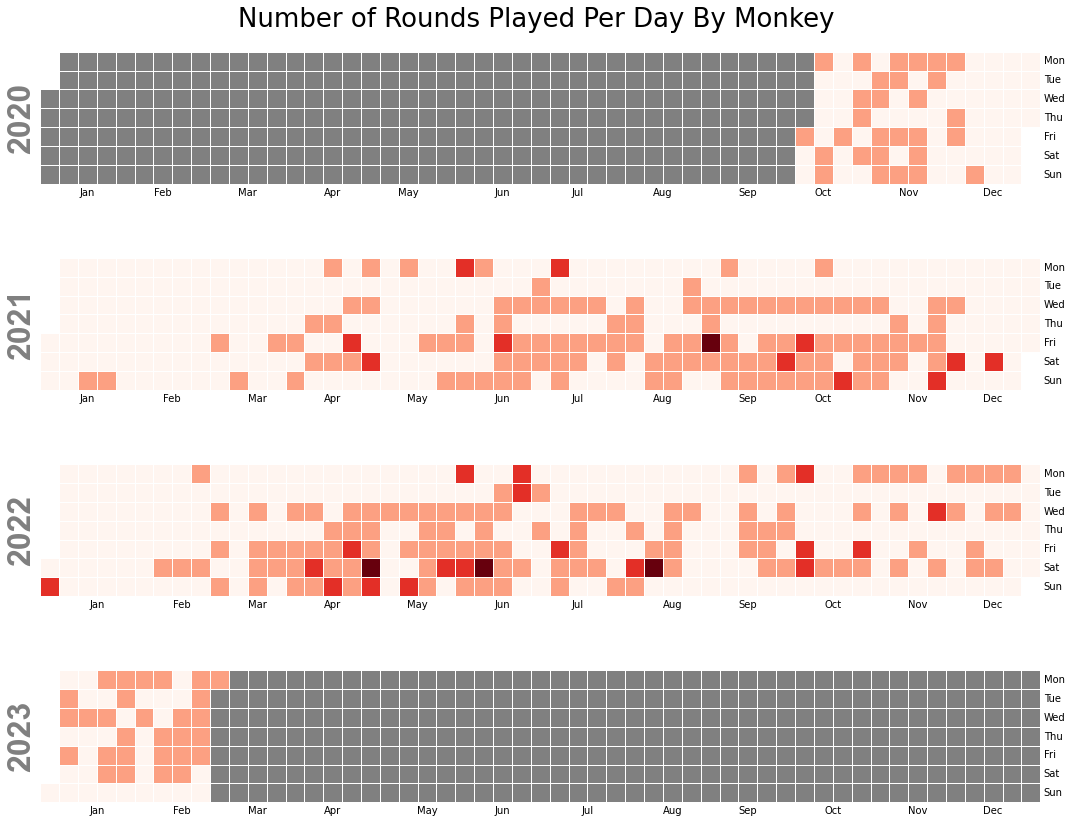

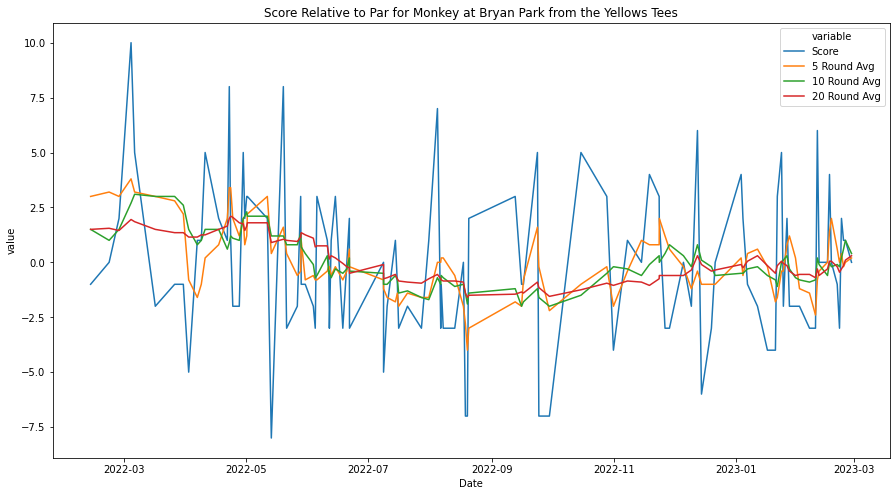

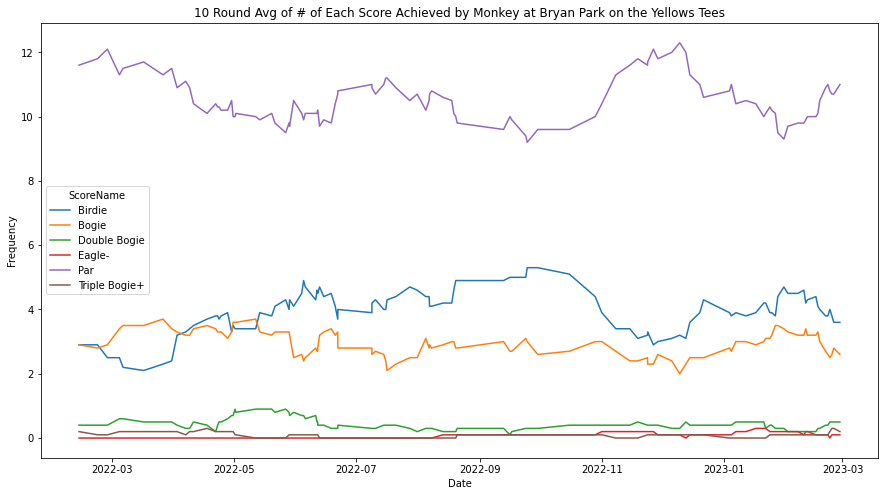

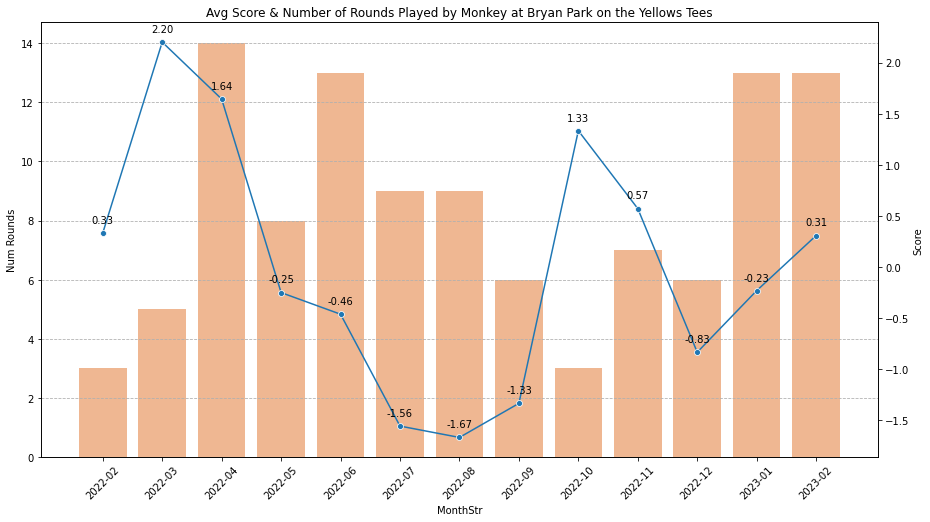

In [7]:
get_player_stats(
    df=df,
    player="Monkey",
    course=course,
    layout=layout,
    min_date=min_date
)

Yearly Stats for Bryan Der at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18
6,Bryan Der,Bryan Park,Yellows Tees,2021,67.720000,9.720000,3.360000,3.840000,3.600000,4.720000,3.200000,3.240000,3.120000,4.400000,4.280000,4.080000,5.68000,3.320000,3.36,4.120000,3.200000,2.600000,4.320000,3.28
7,Bryan Der,Bryan Park,Yellows Tees,2022,62.952381,4.952381,3.095238,3.428571,3.571429,4.428571,3.142857,3.190476,2.904762,4.095238,3.761905,3.666667,5.47619,2.904762,3.00,3.571429,3.047619,2.857143,3.809524,3.00


/Users/justin/github/udisc_stats/udisc_stats/visualize.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df["MonthStr"] = viz_df["Month"].dt.strftime("%Y-%m")


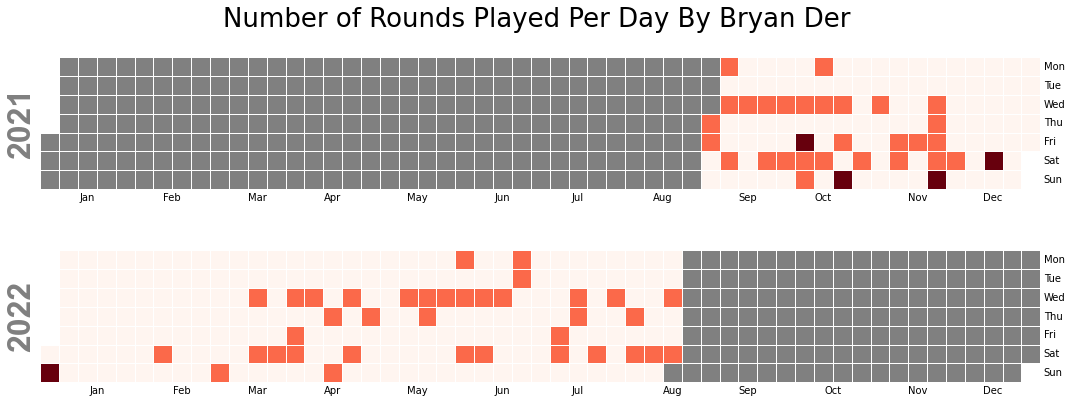

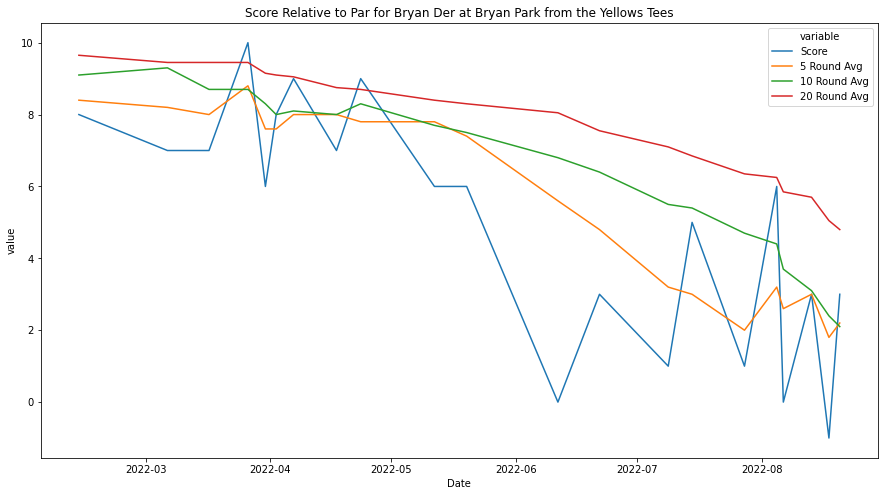

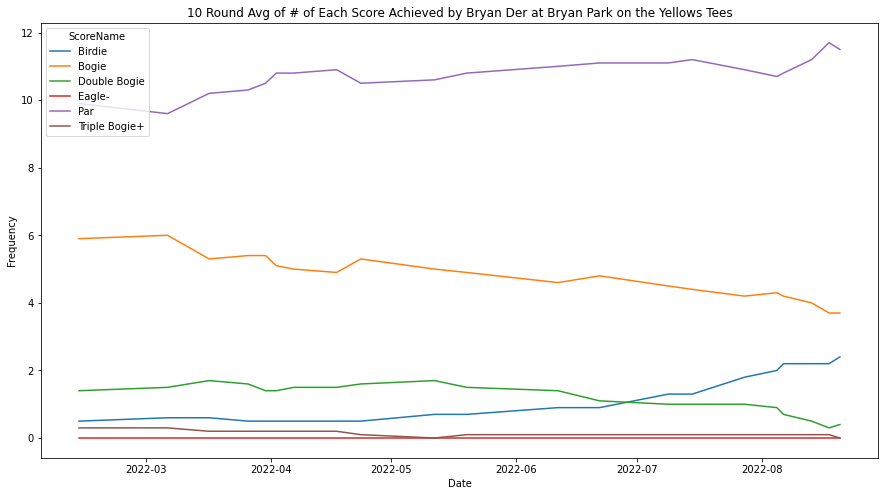

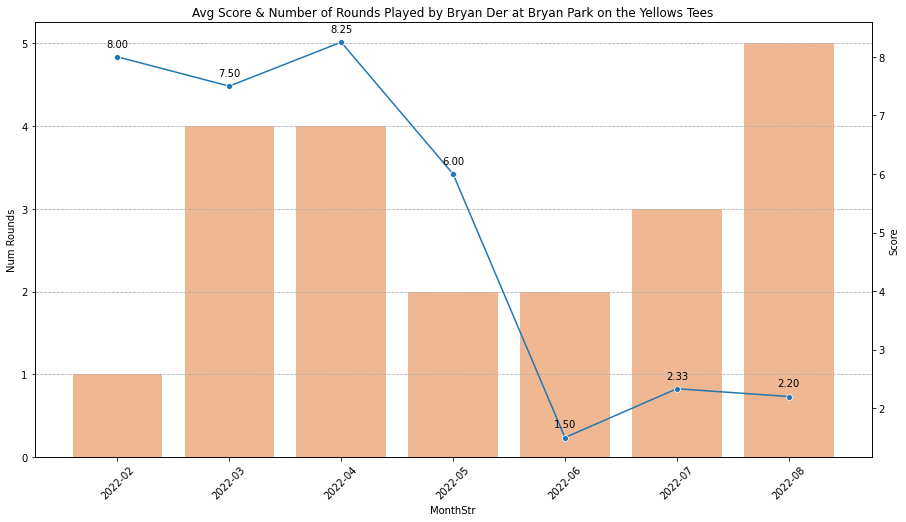

In [8]:
get_player_stats(
    df=df,
    player="Bryan Der",
    course=course,
    layout=layout,
    min_date=min_date
)

Yearly Stats for Riley at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18
109,Riley,Bryan Park,Yellows Tees,2021,77.250000,19.250000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.500000,4.500000,4.500000,4.000000,6.250000,4.250000,4.250000,4.250000,4.250000,3.250000,5.750000,3.500000
110,Riley,Bryan Park,Yellows Tees,2022,69.761905,11.761905,3.523810,3.380952,3.904762,4.809524,3.809524,3.809524,3.476190,4.047619,4.190476,4.095238,5.714286,3.714286,3.238095,3.857143,3.238095,3.523810,4.714286,2.714286
111,Riley,Bryan Park,Yellows Tees,2023,69.333333,11.333333,3.222222,3.666667,3.888889,4.222222,3.777778,3.555556,3.444444,4.222222,4.111111,4.222222,6.000000,3.111111,3.222222,4.111111,3.222222,3.444444,4.888889,3.000000


/Users/justin/github/udisc_stats/udisc_stats/visualize.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df["MonthStr"] = viz_df["Month"].dt.strftime("%Y-%m")


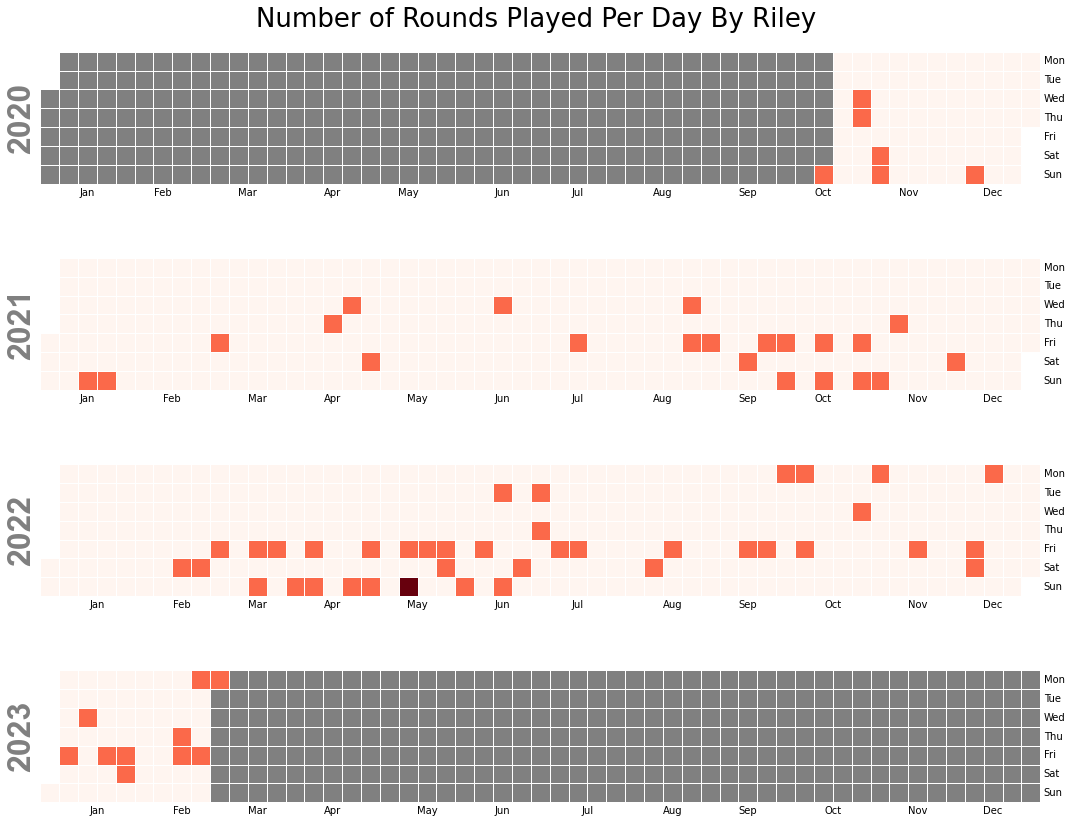

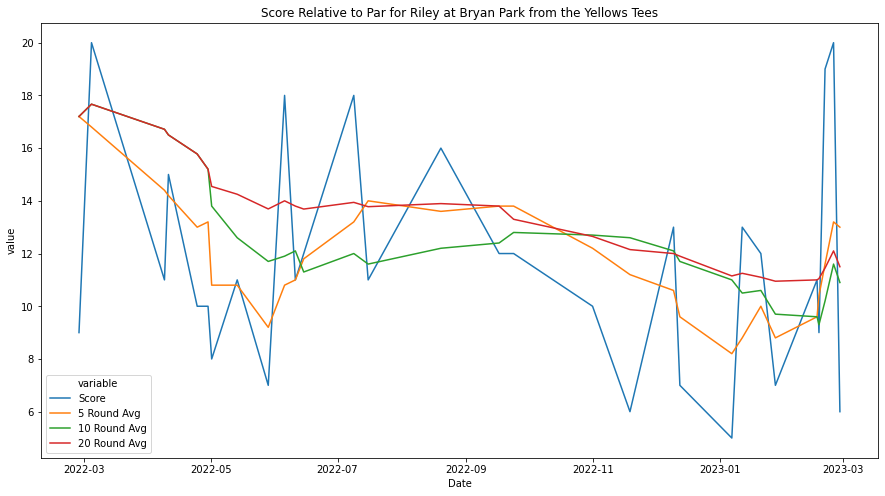

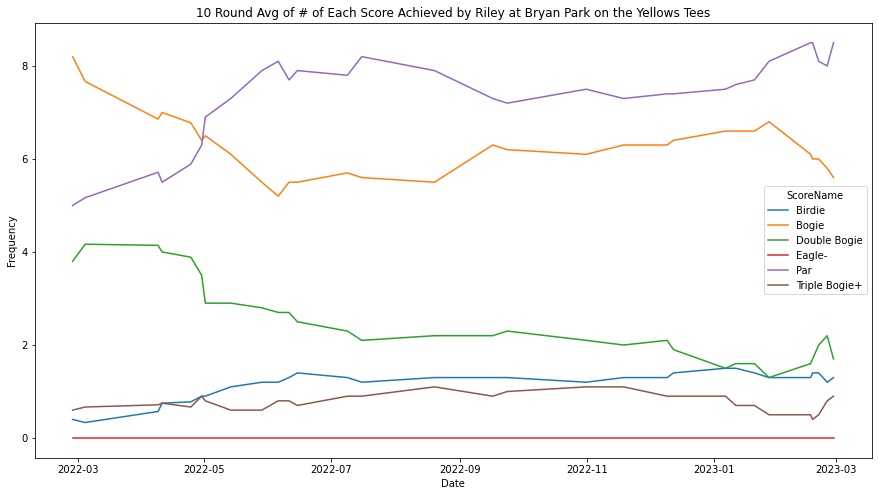

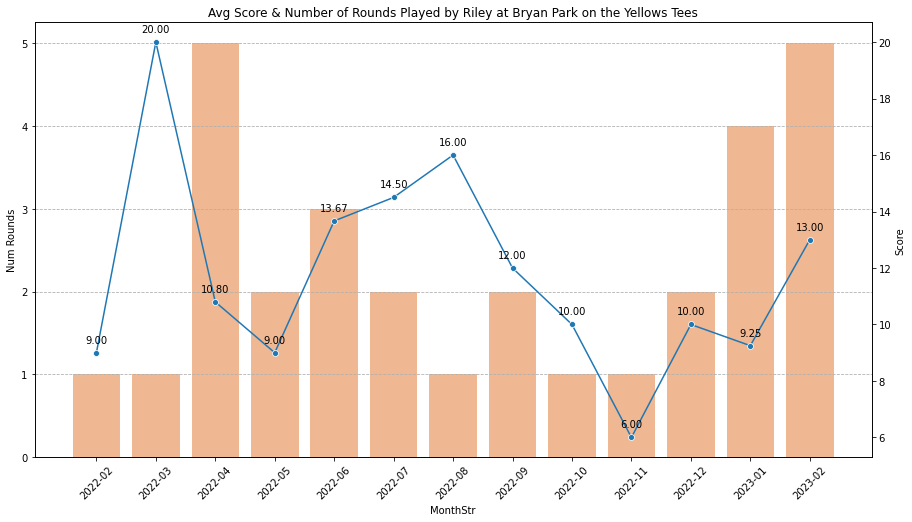

In [9]:
get_player_stats(
    df=df,
    player="Riley",
    course=course,
    layout=layout,
    min_date=min_date,
)